<a href="https://colab.research.google.com/github/VitalyShpak9222/TEMA-9-10-Newron-network/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B0%D0%BC_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import random
import numpy as np
import torchvision.transforms as transforms

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

import torchvision.datasets

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True, transform=transform)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False, transform=transforms.ToTensor())

X_train = MNIST_train.data.unsqueeze(1).float()
y_train = MNIST_train.targets
X_test = MNIST_test.data.unsqueeze(1).float()
y_test = MNIST_test.targets

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 132MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 27.2MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 105MB/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.50MB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(1, 6, kernel_size=5, padding=2)
        self.bn1 = torch.nn.BatchNorm2d(6)
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(6, 16, kernel_size=5, padding=0)
        self.bn2 = torch.nn.BatchNorm2d(16)
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 240)
        self.act3 = torch.nn.ReLU()

        self.fc2 = torch.nn.Linear(240, 104)
        self.act4 = torch.nn.ReLU()

        self.fc3 = torch.nn.Linear(104, 10)

    def forward(self, x):
        x = self.pool1(self.act1(self.bn1(self.conv1(x))))
        x = self.pool2(self.act2(self.bn2(self.conv2(x))))
        x = x.view(x.size(0), -1)
        x = self.act3(self.fc1(x))
        x = self.act4(self.fc2(x))
        x = self.fc3(x)
        return x

lenet5 = LeNet5()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)


In [ ]:
batch_size = 100
num_epochs = 40

test_accuracy_history = []
train_accuracy_history = []
test_loss_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)

for epoch in range(num_epochs):
    lenet5.train()
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index+batch_size]
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        preds = lenet5(X_batch)
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        optimizer.step()

    # Валидация
    with torch.no_grad():
        lenet5.eval()
        test_preds = lenet5(X_test)
        test_accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
        test_accuracy_history.append(test_accuracy)
        test_loss_history.append(loss(test_preds, y_test).data.cpu())

        train_preds = lenet5(X_train)
        train_accuracy = (train_preds.argmax(dim=1) == y_train).float().mean().item()
        train_accuracy_history.append(train_accuracy)
        train_loss_history.append(loss(train_preds, y_train).data.cpu())

    print(f'эпоха: {epoch + 1}/{num_epochs}, точность на тестовом наборе: {test_accuracy:.4f}, точность на тренировочном наборе: {train_accuracy:.4f}')


эпоха: 1/40, точность на тестовом наборе: 0.9851, точность на тренировочном наборе: 0.9843
эпоха: 2/40, точность на тестовом наборе: 0.9882, точность на тренировочном наборе: 0.9893
эпоха: 3/40, точность на тестовом наборе: 0.9854, точность на тренировочном наборе: 0.9873
эпоха: 4/40, точность на тестовом наборе: 0.9897, точность на тренировочном наборе: 0.9924
эпоха: 5/40, точность на тестовом наборе: 0.9888, точность на тренировочном наборе: 0.9910
эпоха: 6/40, точность на тестовом наборе: 0.9889, точность на тренировочном наборе: 0.9940
эпоха: 7/40, точность на тестовом наборе: 0.9904, точность на тренировочном наборе: 0.9950
эпоха: 8/40, точность на тестовом наборе: 0.9924, точность на тренировочном наборе: 0.9973
эпоха: 9/40, точность на тестовом наборе: 0.9906, точность на тренировочном наборе: 0.9955
эпоха: 10/40, точность на тестовом наборе: 0.9916, точность на тренировочном наборе: 0.9971
эпоха: 11/40, точность на тестовом наборе: 0.9913, точность на тренировочном наборе: 0.99

In [ ]:
np.save('P1.npy', data)
print("Данные сохранены в файл 'data.npy'.")

# Чтение массива из файла
loaded_data = np.load('data.npy')
print("Данные загружены из файла 'data.npy':", loaded_data)


In [ ]:
counter = 0
for i in range(num_epochs):
   print(f'эпоха: {i + 1}/{num_epochs}, ошибка на тестовом наборе: {test_loss_history[i]:.4f}, ошибка на тренировочном наборе: {train_loss_history[i]:.4f}')

эпоха: 1/40, ошибка на тестовом наборе: 0.0576, ошибка на тренировочном наборе: 0.0602
эпоха: 2/40, ошибка на тестовом наборе: 0.0404, ошибка на тренировочном наборе: 0.0402
эпоха: 3/40, ошибка на тестовом наборе: 0.0307, ошибка на тренировочном наборе: 0.0262
эпоха: 4/40, ошибка на тестовом наборе: 0.0273, ошибка на тренировочном наборе: 0.0208
эпоха: 5/40, ошибка на тестовом наборе: 0.0437, ошибка на тренировочном наборе: 0.0351
эпоха: 6/40, ошибка на тестовом наборе: 0.0295, ошибка на тренировочном наборе: 0.0162
эпоха: 7/40, ошибка на тестовом наборе: 0.0434, ошибка на тренировочном наборе: 0.0279
эпоха: 8/40, ошибка на тестовом наборе: 0.0212, ошибка на тренировочном наборе: 0.0086
эпоха: 9/40, ошибка на тестовом наборе: 0.0336, ошибка на тренировочном наборе: 0.0182
эпоха: 10/40, ошибка на тестовом наборе: 0.0269, ошибка на тренировочном наборе: 0.0088
эпоха: 11/40, ошибка на тестовом наборе: 0.0256, ошибка на тренировочном наборе: 0.0086
эпоха: 12/40, ошибка на тестовом наборе: 

<ipython-input-5-57431f18f3b7>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
<ipython-input-5-57431f18f3b7>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


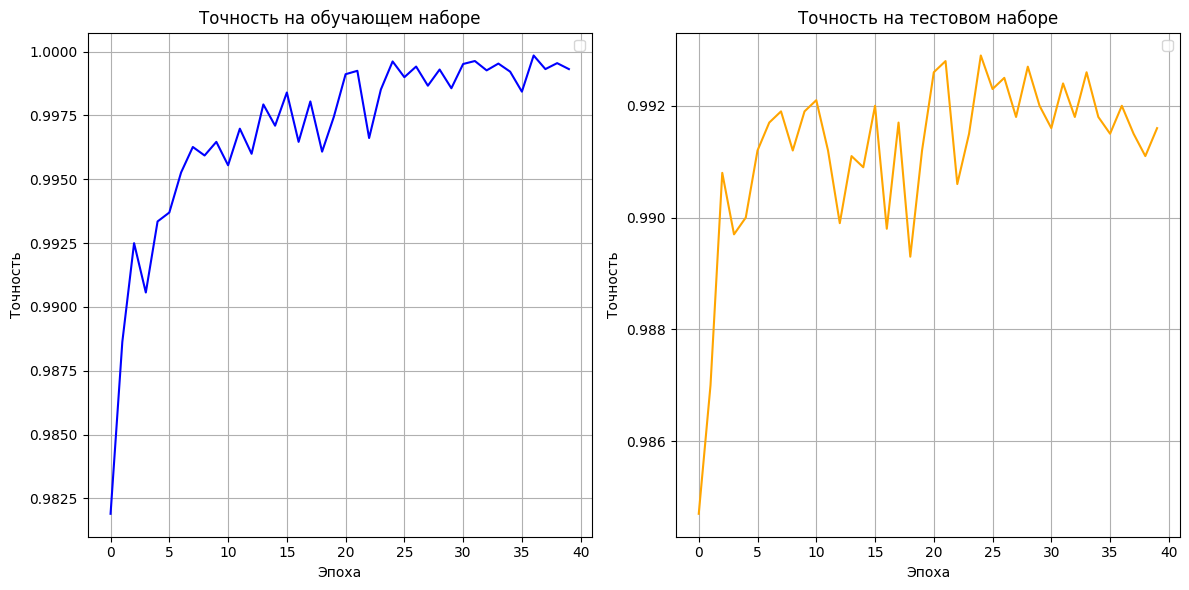

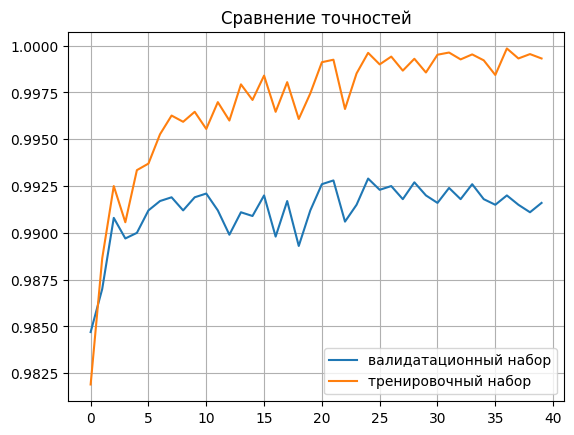

In [ ]:
# Построение графиков точности
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(train_accuracy_history, color='blue')
ax1.set_title("Точность на обучающем наборе")
ax1.set_xlabel("Эпоха")
ax1.set_ylabel("Точность")
ax1.grid(True)
ax1.legend()

ax2.plot(test_accuracy_history, color='orange')
ax2.set_title("Точность на тестовом наборе")
ax2.set_xlabel("Эпоха")
ax2.set_ylabel("Точность")
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.savefig("точность_1.jpg")
plt.show()

plt.plot(test_accuracy_history, label="валидатационный набор")
plt.plot(train_accuracy_history, label="тренировочный набор")
plt.title("Сравнение точностей")
plt.legend()
plt.savefig("точность_2.jpg")
plt.grid(True)


На первых 20 эпохах точность на тестовом наборе продолжает расти или остается стабильной, в то время как на тренировочном наборе точность возрастает.
После 20-й эпохи наблюдается колебание в значениях точности на тестовом наборе, но при этом точность на тренировочном наборе остается высокой.
Значения лосс-функции:
Лосс-функция на тестовых данных уменьшается до 20-й эпохи, затем показывает небольшие колебания. В некоторых случаях, например, после 20-й эпохи, наблюдается увеличение лосса.

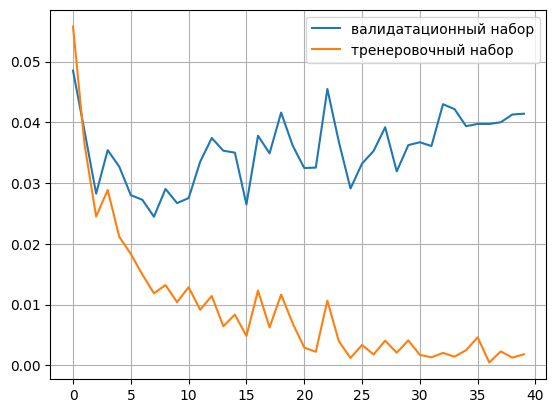

In [ ]:
plt.plot(test_loss_history, label = "валидатационный набор");
plt.plot(train_loss_history, label = "тренеровочный набор");
plt.legend()
plt.savefig("ошибка.jpg")
plt.grid(True)

In [ ]:
ac_history = []
l_history = []
test_size = 1000

order = np.random.permutation(len(X_test))
numerator = 0
for start_index in range(0, len(X_test), test_size):
    numerator += 1
    batch_indexes = order[start_index:start_index+test_size]
    X_batch = X_test[batch_indexes]
    y_batch = y_test[batch_indexes]
    preds = lenet5(X_batch)
    ac = (preds.argmax(dim=1) == y_batch).float().mean().item()
    ac_history.append(ac)
    loss_val = loss(preds, y_batch)
    l_history.append(loss_val.item())
    print(f'точность для запуска {numerator}: {ac}')

n_ac = len(ac_history)
mean_ac = sum(ac_history) / n_ac
variance_ac = sum((x - mean_ac) ** 2 for x in ac_history) / (n_ac - 1)

n_loss = len(l_history)
mean_loss = sum(l_history) / n_loss
variance_loss = sum((x - mean_loss) ** 2 for x in l_history) / (n_loss - 1)

print('\n')
print(f"Средняя точность: {mean_ac:.10f}")
print(f"Дисперсия точности: {variance_ac:.10f}")
print(f"Дисперсия целевой метрики: {variance_loss:.10f}")

точность для запуска 1: 0.9909999966621399
точность для запуска 2: 0.9879999756813049
точность для запуска 3: 0.9909999966621399
точность для запуска 4: 0.9890000224113464
точность для запуска 5: 0.9909999966621399
точность для запуска 6: 0.9990000128746033
точность для запуска 7: 0.9919999837875366
точность для запуска 8: 0.9940000176429749
точность для запуска 9: 0.9890000224113464
точность для запуска 10: 0.9929999709129333


Средняя точность: 0.9916999996
Дисперсия точности: 0.0000100111
Дисперсия целевой метрики: 0.0002510523
